## The Demonstration of Dice Rolling Functions

### 1. Rolling N Sided Fair Dice K times

In [1]:
import numpy as np


def outcome_of_rolling_n_sided_dice_k_time(n_side: int, k_time: int) -> float:
    """
     The sum of outcomes for rolling an N-sided dice K times.

     This function returns an array. The last two elements are the 
     range of probability distribution.
     The range is: 'k_time' to 'k_time*n_side'

     Other elements contain probabilities for getting a summation 
     from 'k_time' to 'k_time*n_side'.

     Algorithm Explanation:

     1. Explanation of range:
     When we are rolling a six-sided dice the range becomes
     1 to 6.
     While rolling 5 times range becomes 5 to 30.
     The sum outcomes become 5 when all rolling finds 1.
     30 happens when all rolling finds 6.
     1 is the minimum and 6 is the maximum of side values
     for a 6 sided dice. Therefore, the range is 5 to 30.
     Therefore, the range is k to n*k.

     2. Explanation of probability distribution:
     Say we are rolling a six-sided dice 2 times.
     for 0 roll, the outcome is 0 with probability 1.
     For the first roll, the outcome is 1 to 6 equally distributed.

     For the second roll, each previous outcome (1-6) will face
     an addition from the second rolling (1-6).
     If the first outcome is (known) 3, then the probability of
     getting each of 4 to 9 will be 1/6.

     While rolling 2 dice simultaneously,
     the sum becomes 2 for two 1 outcomes. But the sum becomes
     3 for two different outcome combinations (1,2) and (2,1).
     The probability of getting 2 is 1/36.
     The probability of getting 3 is 2/36.

     Link to rolling two 6-sided dice combinations:
     https://www.thoughtco.com/
     probabilities-of-rolling-two-dice-3126559
     That phenomenon is the same as the convolution. 

     The algorithm can be used in playing games or solving 
     problems where the sum of multiple dice throwing is needed.


     NB: a) We are assuming a fair dice
     b) Bernoulli's theory works with getting the probability of
     exactly 3 sixes while rolling 5 times. It does not work directly
     with the sum. The same sum can come in many combinations.
     Finding all of those combinations and applying Bernoulli
     is more computationally extensive.
     
     I used that method in my paper to draw the distribution
     Titled: Uncertainty-aware Decisions in Cloud Computing:
     Foundations and Future Directions
     Journal: ACM Computing Surveys (CSUR)
     link: https://dl.acm.org/doi/abs/10.1145/3447583
     The PDF version of the paper is available on Google Scholar.


     >>> import numpy as np
     >>> outcome_of_rolling_n_sided_dice_k_time(.2,.5)
     Traceback (most recent call last):
         ...
     ValueError: The function only accepts integer values
     >>> outcome_of_rolling_n_sided_dice_k_time(-1,5)
     Traceback (most recent call last):
         ...
     ValueError: Side count should be more than 1
     >>> outcome_of_rolling_n_sided_dice_k_time(3,-2)
     Traceback (most recent call last):
         ...
     ValueError: Roll count should be more than 0

     >>> outcome_of_rolling_n_sided_dice_k_time(2,2)
     array([0.25, 0.5 , 0.25, 2.  , 4.  ])
     >>> outcome_of_rolling_n_sided_dice_k_time(2,4)
     array([0.0625, 0.25  , 0.375 , 0.25  , 0.0625, 4.    , 8.    ])

    """

    if n_side != int(n_side) or k_time != int(k_time):
        raise ValueError("The function only accepts integer values")
    if n_side < 2:
        raise ValueError("Side count should be more than 1")
    if k_time < 1:
        raise ValueError("Roll count should be more than 0")
    if k_time > 100 or n_side > 100:
        raise ValueError("Limited to 100 sides or rolling to avoid memory issues")

    prob_dist = 1
    dist_step = np.ones(n_side, dtype=float) / n_side

    iter1 = 0
    while iter1 < k_time:
        prob_dist = np.convolve(prob_dist, dist_step)
        iter1 = iter1 + 1
        
    prob_index = np.concatenate((prob_dist, np.array([k_time, k_time*n_side])))

    return prob_index


"""
# Extra code for the verification

dist_index = outcome_of_rolling_n_sided_dice_k_time(6, 3)

the_range = range(int(dist_index[-2]), int(dist_index[-1]+1))
probabilities =  dist_index[:-2]
print("Indexes:",the_range)

print("Distribution:",probabilities, "Their summation:",np.sum(probabilities))

import matplotlib.pyplot as plt
plt.bar(the_range, probabilities)
plt.xlabel("Summation of Outcomes")
plt.ylabel("Probabilities")

"""


'\n# Extra code for the verification\n\ndist_index = outcome_of_rolling_n_sided_dice_k_time(6, 3)\n\nthe_range = range(int(dist_index[-2]), int(dist_index[-1]+1))\nprobabilities =  dist_index[:-2]\nprint("Indexes:",the_range)\n\nprint("Distribution:",probabilities, "Their summation:",np.sum(probabilities))\n\nimport matplotlib.pyplot as plt\nplt.bar(the_range, probabilities)\nplt.xlabel("Summation of Outcomes")\nplt.ylabel("Probabilities")\n\n'

### 2. Rolling N Sided Fair Dice K times: Investigation and Visualization with Plotting

Indexes: range(3, 19)
Distribution: [0.00462963 0.01388889 0.02777778 0.0462963  0.06944444 0.09722222
 0.11574074 0.125      0.125      0.11574074 0.09722222 0.06944444
 0.0462963  0.02777778 0.01388889 0.00462963] Their summation: 1.0


Text(0, 0.5, 'Probabilities')

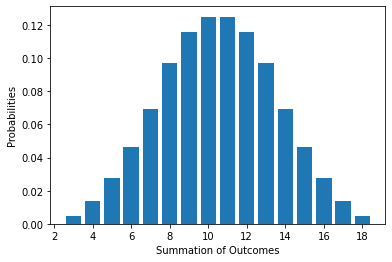

In [2]:
dist_index = outcome_of_rolling_n_sided_dice_k_time(6, 3)

the_range = range(int(dist_index[-2]), int(dist_index[-1]+1))
probabilities =  dist_index[:-2]
print("Indexes:",the_range)

print("Distribution:",probabilities, "Their summation:",np.sum(probabilities))

import matplotlib.pyplot as plt
plt.bar(the_range, probabilities)
plt.xlabel("Summation of Outcomes")
plt.ylabel("Probabilities")

In [3]:
outcome_of_rolling_n_sided_dice_k_time(4,3)

array([ 0.015625,  0.046875,  0.09375 ,  0.15625 ,  0.1875  ,  0.1875  ,
        0.15625 ,  0.09375 ,  0.046875,  0.015625,  3.      , 12.      ])

### 3. Rolling N Sided Unfair Dice K times

In [4]:
import numpy as np


def outcome_of_rolling_unfair_dice_k_time(dist_prob_1: float, k_time: int) -> float:
    
    """
     The sum of outcomes for rolling an unfair dice K times.

     This function returns an array. The last two elements are the 
     range of probability distribution.
     The range is: 'k_time' to 'k_time*(number_of_sides)'

     Other elements contain probabilities for getting a summation 
     from 'k_time' to 'k_time*(number_of_sides)'.

    """
    
    if k_time != int(k_time):
        raise ValueError("The function only accepts integer values of k")
    if len(dist_prob_1) < 2:
        raise ValueError("The number of sides should be more than 1")
    if k_time < 1:
        raise ValueError("Roll count should be more than 0")
    if k_time > 100 or len(dist_prob_1) > 100:
        raise ValueError("Limited to 100 sides or rolling to avoid memory issues")
        
    prob_dist = 1
    iter1 = 0
    while iter1 < k_time:
        prob_dist = np.convolve(prob_dist, dist_prob_1)
        iter1 = iter1 + 1
        
    prob_index = np.concatenate((prob_dist, np.array([k_time, k_time*len(dist_prob_1)])))

    return prob_index

### 4. Rolling N Sided Unfair Dice K times: Investigation

In [5]:
outcome_of_rolling_unfair_dice_k_time([.2, .8], 3)

array([0.008, 0.096, 0.384, 0.512, 3.   , 6.   ])

### 5. Probability of Getting N Heads for M Number of Tossing 

#### Here, 0 for tail and 1 for head.

In [6]:
import numpy as np


def probability_of_n_heads_in_m_tossing(head_count: int, toss_count: int) -> float:
    """
   The probability of getting exactly n heads in m tossing.

    Algorithm Explanation:
    If you toss 0 time -> 0 head
    Distribution [1] -> Meaning: 1 in the 0-index

    If you toss 1 time -> 0 or 1 head
    Distribution [0.5 0.5] -> Meaning: 0.5 in both indexes

    If you toss 2 times -> 0 to 2 heads
    Distribution [0.25 0.5 0.25] ->
    Meaning:  probability of n heads from the distribution
    {HH, HT, TH, TT}

    If you toss 3 times -> 0 to 3 heads
    Distribution [0.125 0.375 0.375 0.125] ->
    Meaning:  probability of n heads from the distribution
    {HHH, HHT, HTH, HTT, THH, THT, TTH, TTT}

    Therefore,
    Probability_distribution(N+1) =
          [Probability_distribution(N) 0]/2 + [0 Probability_distribution(N)]/2

    I used that method in my paper
    Titled: Uncertainty-aware Decisions in Cloud Computing:
    Foundations and Future Directions
    Journal: ACM Computing Surveys (CSUR)

    >>> import numpy as np
    >>> probability_of_n_heads_in_m_tossing(.2,.5)
    Traceback (most recent call last):
        ...
    ValueError: The function only accepts integer values
    >>> probability_of_n_heads_in_m_tossing(-1,5)
    Traceback (most recent call last):
        ...
    ValueError: The function is not defined for negative values
    >>> probability_of_n_heads_in_m_tossing(3,2)
    Traceback (most recent call last):
        ...
    ValueError: Head count should be smaller than toss count

    >>> probability_of_n_heads_in_m_tossing(1,1)
    0.5
    >>> probability_of_n_heads_in_m_tossing(0,2)
    0.25
    >>> probability_of_n_heads_in_m_tossing(2,3)
    0.375
    """
    if head_count != int(head_count) or toss_count != int(toss_count):
        raise ValueError("The function only accepts integer values")
    if head_count < 0 or toss_count < 0:
        raise ValueError("The function only accepts positive values")
    if head_count > toss_count:
        raise ValueError("Head count should be smaller than toss count")
    if toss_count > 100:
        raise ValueError("Limited to 100 tossing to avoid memory issues")

    value = np.ones(1)

    iter1 = 0
    while iter1 < toss_count:
        value = np.append(value, [0], axis=0) + np.append([0], value, axis=0)
        value = value / 2
        iter1 = iter1 + 1

    return value[head_count]

probability_of_n_heads_in_m_tossing(2,2)

0.25